##### In this project, we use pyspark to explore a dataset from the San Francisco Police Department

In [2]:
#import the data reader
from csv import reader

In [3]:
#read data from the data storage
#crime_data_lines = sc.textFile('/FileStore/tables/sf_data.csv')
crime_data_lines = sc.textFile('/FileStore/tables/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')
#prepare data 
df_crimes = crime_data_lines.map(lambda line: [x.strip('"') for x in next(reader([line]))])
#get header
header = df_crimes.first()
header

Out[ 2 ]: 
['IncidntNum',
 'Category',
 'Descript',
 'DayOfWeek',
 'Date',
 'Time',
 'PdDistrict',
 'Resolution',
 'Address',
 'X',
 'Y',
 'Location',
 'PdId']

In [4]:
#remove the first line of data
crimes = df_crimes.filter(lambda x: x != header)

In [5]:
#get the first line of data
display(crimes.take(10))

_1,_2,_3,_4,_5,_6,_7,_8,_9,_10,_11,_12,_13
150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.42158168137,37.7617007179518,"(37.7617007179518, -122.42158168137)",15006027571000
150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821003074
150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821004014
150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821015200
150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431118543788,37.8004687042875,"(37.8004687042875, -122.431118543788)",15009822628160
150098232,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Sunday,02/01/2015,16:21,RICHMOND,NONE,400 Block of LOCUST ST,-122.451781767894,37.7870853907529,"(37.7870853907529, -122.451781767894)",15009823251041
150098248,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824815200
150098248,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824828150
150098254,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,01/31/2015,16:09,CENTRAL,NONE,200 Block of STOCKTON ST,-122.40656817787,37.7878092959561,"(37.7878092959561, -122.40656817787)",15009825405053
150098260,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,01/31/2015,17:00,CENTRAL,NONE,800 Block of GEARY ST,-122.417295322526,37.7862578545865,"(37.7862578545865, -122.417295322526)",15009826006362


#### There are 3 options to get distributed data into dataframe and SQL table

#### option 1 to get dataframe and sql

In [8]:

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load("/FileStore/tables/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv")
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.42158168137,37.7617007179518,"(37.7617007179518, -122.42158168137)",15006027571000
150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821003074
150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821004014
150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821015200
150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431118543788,37.8004687042875,"(37.8004687042875, -122.431118543788)",15009822628160
150098232,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Sunday,02/01/2015,16:21,RICHMOND,NONE,400 Block of LOCUST ST,-122.451781767894,37.7870853907529,"(37.7870853907529, -122.451781767894)",15009823251041
150098248,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824815200
150098248,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824828150
150098254,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,01/31/2015,16:09,CENTRAL,NONE,200 Block of STOCKTON ST,-122.40656817787,37.7878092959561,"(37.7878092959561, -122.40656817787)",15009825405053
150098260,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,01/31/2015,17:00,CENTRAL,NONE,800 Block of GEARY ST,-122.417295322526,37.7862578545865,"(37.7862578545865, -122.417295322526)",15009826006362


#### option 2 to get dataframe and sql

#####  Let's transform the RDD to data frame, which would be easier to handle and explore. First, we need to convert RDD elements to RDD Row objects. We can define a function below to take a list of column names (header) and a list of values (one row of our data) and then create a RDD Row of key-value pairs.

In [11]:

from pyspark.sql import Row

def createRow(keys, values):
  assert len(keys) == len(values)
  mapped = dict(zip(keys, values))
  return Row(**mapped)

rdd_rows = crimes.map(lambda x: createRow(header, x))

df_opt2 = spark.createDataFrame(rdd_rows)
df_opt2.createOrReplaceTempView("sf_crime")
display(df_opt2)

Address,Category,Date,DayOfWeek,Descript,IncidntNum,Location,PdDistrict,PdId,Resolution,Time,X,Y
18TH ST / VALENCIA ST,NON-CRIMINAL,01/19/2015,Monday,LOST PROPERTY,150060275,"(37.7617007179518, -122.42158168137)",MISSION,15006027571000,NONE,14:00,-122.42158168137,37.7617007179518
300 Block of LEAVENWORTH ST,ROBBERY,02/01/2015,Sunday,"ROBBERY, BODILY FORCE",150098210,"(37.7841907151119, -122.414406029855)",TENDERLOIN,15009821003074,NONE,15:45,-122.414406029855,37.7841907151119
300 Block of LEAVENWORTH ST,ASSAULT,02/01/2015,Sunday,AGGRAVATED ASSAULT WITH BODILY FORCE,150098210,"(37.7841907151119, -122.414406029855)",TENDERLOIN,15009821004014,NONE,15:45,-122.414406029855,37.7841907151119
300 Block of LEAVENWORTH ST,SECONDARY CODES,02/01/2015,Sunday,DOMESTIC VIOLENCE,150098210,"(37.7841907151119, -122.414406029855)",TENDERLOIN,15009821015200,NONE,15:45,-122.414406029855,37.7841907151119
LOMBARD ST / LAGUNA ST,VANDALISM,01/27/2015,Tuesday,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",150098226,"(37.8004687042875, -122.431118543788)",NORTHERN,15009822628160,NONE,19:00,-122.431118543788,37.8004687042875
400 Block of LOCUST ST,NON-CRIMINAL,02/01/2015,Sunday,AIDED CASE -PROPERTY FOR DESTRUCTION,150098232,"(37.7870853907529, -122.451781767894)",RICHMOND,15009823251041,NONE,16:21,-122.451781767894,37.7870853907529
700 Block of KIRKWOOD AV,SECONDARY CODES,01/31/2015,Saturday,DOMESTIC VIOLENCE,150098248,"(37.729203356539, -122.374019331833)",BAYVIEW,15009824815200,NONE,21:00,-122.374019331833,37.729203356539
700 Block of KIRKWOOD AV,VANDALISM,01/31/2015,Saturday,"MALICIOUS MISCHIEF, VANDALISM",150098248,"(37.729203356539, -122.374019331833)",BAYVIEW,15009824828150,NONE,21:00,-122.374019331833,37.729203356539
200 Block of STOCKTON ST,BURGLARY,01/31/2015,Saturday,"BURGLARY OF STORE, UNLAWFUL ENTRY",150098254,"(37.7878092959561, -122.40656817787)",CENTRAL,15009825405053,NONE,16:09,-122.40656817787,37.7878092959561
800 Block of GEARY ST,LARCENY/THEFT,01/31/2015,Saturday,PETTY THEFT SHOPLIFTING,150098260,"(37.7862578545865, -122.417295322526)",CENTRAL,15009826006362,NONE,17:00,-122.417295322526,37.7862578545865


#### option 3 to get dataframe and sql

In [13]:

df_opt3 = crimes.toDF(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'])
display(df_opt3)
df_opt3.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
150060275,NON-CRIMINAL,LOST PROPERTY,Monday,01/19/2015,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.42158168137,37.7617007179518,"(37.7617007179518, -122.42158168137)",15006027571000
150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821003074
150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821004014
150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,02/01/2015,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406029855,37.7841907151119,"(37.7841907151119, -122.414406029855)",15009821015200
150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,01/27/2015,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431118543788,37.8004687042875,"(37.8004687042875, -122.431118543788)",15009822628160
150098232,NON-CRIMINAL,AIDED CASE -PROPERTY FOR DESTRUCTION,Sunday,02/01/2015,16:21,RICHMOND,NONE,400 Block of LOCUST ST,-122.451781767894,37.7870853907529,"(37.7870853907529, -122.451781767894)",15009823251041
150098248,SECONDARY CODES,DOMESTIC VIOLENCE,Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824815200
150098248,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Saturday,01/31/2015,21:00,BAYVIEW,NONE,700 Block of KIRKWOOD AV,-122.374019331833,37.729203356539,"(37.729203356539, -122.374019331833)",15009824828150
150098254,BURGLARY,"BURGLARY OF STORE, UNLAWFUL ENTRY",Saturday,01/31/2015,16:09,CENTRAL,NONE,200 Block of STOCKTON ST,-122.40656817787,37.7878092959561,"(37.7878092959561, -122.40656817787)",15009825405053
150098260,LARCENY/THEFT,PETTY THEFT SHOPLIFTING,Saturday,01/31/2015,17:00,CENTRAL,NONE,800 Block of GEARY ST,-122.417295322526,37.7862578545865,"(37.7862578545865, -122.417295322526)",15009826006362


#### 1. Write a Spark program that counts the number of crimes for different category.

In [15]:
#rdd based
catorgory_set_rdd = crimes.map(lambda item: (item[1],1))
from operator import add
result = sorted(catorgory_set_rdd.reduceByKey(add).collect(), key = lambda item: -item[1])
display(result)

_1,_2
LARCENY/THEFT,480448
OTHER OFFENSES,309358
NON-CRIMINAL,238323
ASSAULT,194694
VEHICLE THEFT,126602
DRUG/NARCOTIC,119628
VANDALISM,116059
WARRANTS,101379
BURGLARY,91543
SUSPICIOUS OCC,80444


In [16]:
#Spark SQL based
crimeCategory = spark.sql("SELECT category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
display(crimeCategory)

category,Count
LARCENY/THEFT,480448
OTHER OFFENSES,309358
NON-CRIMINAL,238323
ASSAULT,194694
VEHICLE THEFT,126602
DRUG/NARCOTIC,119628
VANDALISM,116059
WARRANTS,101379
BURGLARY,91543
SUSPICIOUS OCC,80444


####2. Write a program that counts the number of crimes for different district

In [18]:
#rdd based
district_set_rdd = crimes.map(lambda item: (item[6],1))
from operator import add
result2 = sorted(district_set_rdd.reduceByKey(add).collect(), key = lambda item: -item[1])
display(result2)

_1,_2
SOUTHERN,399785
MISSION,300076
NORTHERN,272713
CENTRAL,226255
BAYVIEW,221000
INGLESIDE,194180
TENDERLOIN,191746
TARAVAL,166971
PARK,125479
RICHMOND,116818


In [19]:
#Spark SQL based
crimeDistrict = spark.sql("SELECT PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY PdDistrict ORDER BY Count DESC")
display(crimeDistrict)

PdDistrict,Count
SOUTHERN,399785
MISSION,300076
NORTHERN,272713
CENTRAL,226255
BAYVIEW,221000
INGLESIDE,194180
TENDERLOIN,191746
TARAVAL,166971
PARK,125479
RICHMOND,116818


#### 3. Count the number of crimes each Sunday at SF downtown.

In [21]:
# a function to check if a location is in give area defined by points' coordinates
def check_location(location, points, count):
  n_cross = 0
  for ii in range(count):
    p1 = points[ii]
    p2 = points[(ii + 1) % count]
    if p1[1] == p2[1]: continue
    if location[1] < min(p1[1], p2[1]): continue
    if location[1] >= max(p1[1], p2[1]): continue
    x = (location[1] - p1[1])*(p2[0] - p1[0])/(p2[1] - p1[1]) + p1[0]
    if x > location[0]: n_cross += 1
  return n_cross%2 == 1

In [22]:
# Based on the Googe map, obtain the five points that define the Downtown area in SF
point1 = (37.797844, -122.407052)
point2 = (37.786668, -122.404698)
point3 = (37.794193, -122.395135)
point4 = (37.795514, -122.396763)
point5 = (37.798967, -122.398074)
points = [point1, point2, point3, point4, point5]

# 5 points lead to 5 edges
edge_count = 5

# check one point not in Downtown SF

location = (37.792583, -122.407915)
check_location(location, points, edge_count)

Out[ 13 ]: False

In [23]:
# Add check function as a UDF 
def check(location):
  location =  eval(location)
  return check_location(location, points, edge_count)
sqlContext.udf.register("CheckWithPython", check)


Out[ 14 ]: <function __main__.check>

In [24]:
from pyspark.sql.functions import to_date

In [25]:
%sql 
SELECT to_date(Date, 'mm/dd/yyyy') as date_new,  COUNT(Location) AS Downtown_Crimes
FROM sf_crime 
WHERE DayOfWeek = 'Sunday'  AND Location IN (SELECT Location FROM sf_crime GROUP BY 1 HAVING CheckWithPython(Location) = 'true' )
GROUP BY date_new   
ORDER BY date_new

date_new,Downtown_Crimes
2003-01-01,11
2003-01-02,20
2003-01-03,8
2003-01-04,8
2003-01-05,15
2003-01-06,20
2003-01-07,19
2003-01-08,4
2003-01-09,16
2003-01-10,7


#### Visualize the spatial distribution of crimes by running a kmeans clustering algorithm with Spark ML

In [27]:
# get the x, y from crimes
aa = crimes.map(lambda x: (x[-4], x[-3]))
spatial = aa.take(aa.count())
spatial[0]

Out[ 16 ]: ('-122.42158168137', '37.7617007179518')

In [28]:
def get_coor(spatial):
  x_coor, y_coor = [], []
  for ii in range(len(spatial)):
    x_coor.append(float(spatial[ii][0]))
    y_coor.append(float(spatial[ii][1]))
  return x_coor, y_coor

def get_coor2(spatial):
  x_coor, y_coor = [], []
  for ii in range(len(spatial)):
    if float(spatial[ii][1])< 50: # to exclude outliers 
      x_coor.append(float(spatial[ii][0]))
      y_coor.append(float(spatial[ii][1]))
  return x_coor, y_coor

In [29]:
x_coor, y_coor = get_coor(spatial)

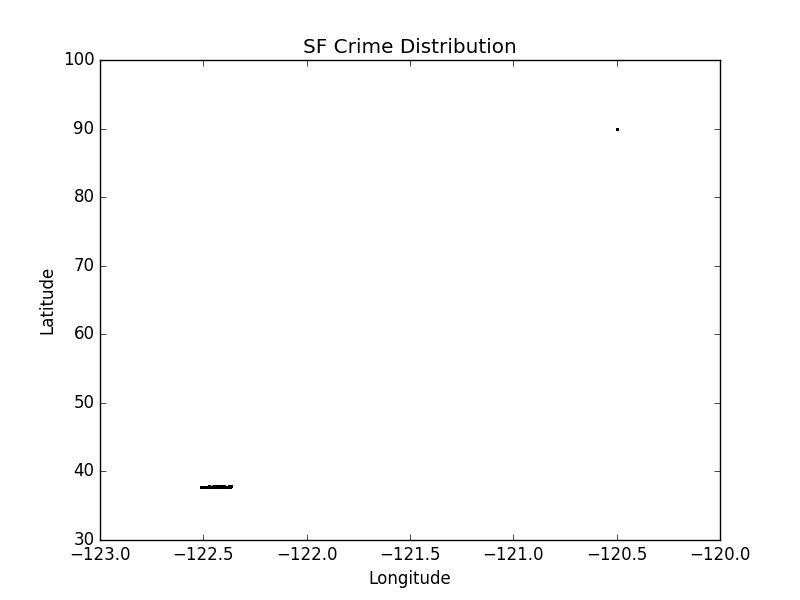

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.title('SF Crime Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(x_coor, y_coor, s = 0.5, c = 'r')
fig_coor = plt.show()

display(fig_coor)

##### It is found that there is one point at (-120.5, 90)! This outlier is obviously a mistake made by the police department. Let's just remove this data point for better visualization.

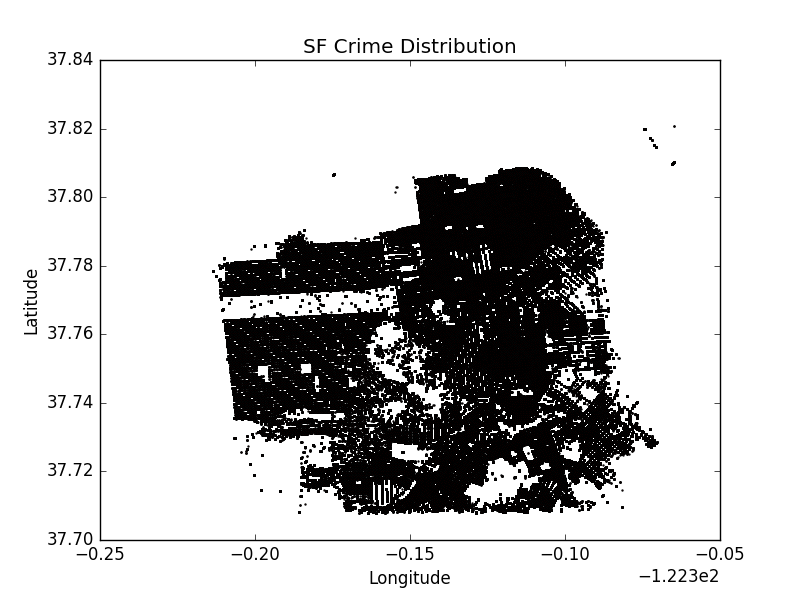

In [32]:
x_coor, y_coor = get_coor2(spatial)
fig = plt.figure()
plt.title('SF Crime Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(x_coor, y_coor, s = 0.5, c = 'r')
fig_coor = plt.show()

display(fig_coor)

In [33]:
#Now we can fit a kmeans model using spatial data
from pyspark.ml.linalg import Vectors
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

spatial[0]
dataset = []
dataset1 = []
for ii in range(len(spatial)):
  if float(spatial[ii][1]) < 50:
    dataset.append((Vectors.dense([float(spatial[ii][0]), float(spatial[ii][1])]),))
    dataset1.append([ii, float(spatial[ii][0]), float(spatial[ii][1])])

df = spark.createDataFrame(dataset, ["features"])


# Trains a k-means model.
kmeans = KMeans(k=4, seed=1, tol=1e-21)  # 2 clusters here
model = kmeans.fit(df)

# Evaluate clustering by computing Within Set Sum of Sqbuared Errors.
wssse = model.computeCost(df)
print("Within Set Sum of Squared Errors = " + str(wssse))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Within Set Sum of Squared Errors = 742.2766332112699
Cluster Centers: 
[-122.4038736 37.73952166]
[-122.41509436 37.78203439]
[-122.4724531 37.76677794]
[-122.45033523 37.72456321]

In [34]:
transformed = model.transform(df)
transformed.select('prediction').show(100,False)  

+----------+
prediction|
+----------+
1 |
1 |
1 |
1 |
1 |
2 |
0 |
0 |
1 |
1 |
1 |
1 |
1 |
1 |
1 |
1 |
1 |
0 |
2 |
0 |
1 |
1 |
0 |
1 |
1 |
1 |
1 |
1 |
0 |
1 |
1 |
1 |
1 |
1 |
1 |
3 |
2 |
1 |
1 |
1 |
1 |
1 |
1 |
1 |
1 |
3 |
1 |
0 |
1 |
1 |
1 |
1 |
1 |
1 |
1 |
1 |
1 |
1 |
1 |
1 |
1 |
1 |
1 |
1 |
0 |
2 |
2 |
2 |
2 |
1 |
1 |
1 |
1 |
0 |
0 |
2 |
1 |
1 |
2 |
0 |
1 |
1 |
1 |
1 |
0 |
1 |
1 |
1 |
2 |
1 |
1 |
1 |
1 |
1 |
0 |
0 |
0 |
1 |
1 |
1 |
+----------+
only showing top 100 rows

In [35]:
rows = transformed.collect()
print(rows[:3])


[Row(features=DenseVector([-122.4216, 37.7617]), prediction=1), Row(features=DenseVector([-122.4144, 37.7842]), prediction=1), Row(features=DenseVector([-122.4144, 37.7842]), prediction=1)]

In [36]:
df_pred = sqlContext.createDataFrame(rows)
df_pred.show()
#df_pred = df_pred.join(df, 'id')
#df_pred.show()

+--------------------+----------+
 features|prediction|
+--------------------+----------+
[-122.42158168137...| 1|
[-122.41440602985...| 1|
[-122.41440602985...| 1|
[-122.41440602985...| 1|
[-122.43111854378...| 1|
[-122.45178176789...| 2|
[-122.37401933183...| 0|
[-122.37401933183...| 0|
[-122.40656817787...| 1|
[-122.41729532252...| 1|
[-122.41335418701...| 1|
[-122.41335418701...| 1|
[-122.41335418701...| 1|
[-122.41335418701...| 1|
[-122.43219802243...| 1|
[-122.42227702764...| 1|
[-122.42227702764...| 1|
[-122.38793945219...| 0|
[-122.45863875860...| 2|
[-122.38977468306...| 0|
+--------------------+----------+
only showing top 20 rows

In [37]:
pddf_pred = df_pred.toPandas()
pddf_pred.head()

Out[ 25 ]: 
 features prediction
0 [-122.421581681, 37.761700718] 1
1 [-122.41440603, 37.7841907151] 1
2 [-122.41440603, 37.7841907151] 1
3 [-122.41440603, 37.7841907151] 1
4 [-122.431118544, 37.8004687043] 1

In [38]:
x_c, y_c = [], []  # vectors of spatial information
c_p = [] # color vector
count = 0
colors = ['red','green','blue','yellow']
for loc in pddf_pred.features:
  x_temp, y_temp = loc
  x_c.append(x_temp)
  y_c.append(y_temp)
  c_p.append(colors[pddf_pred.prediction[count]])
  count+= 1

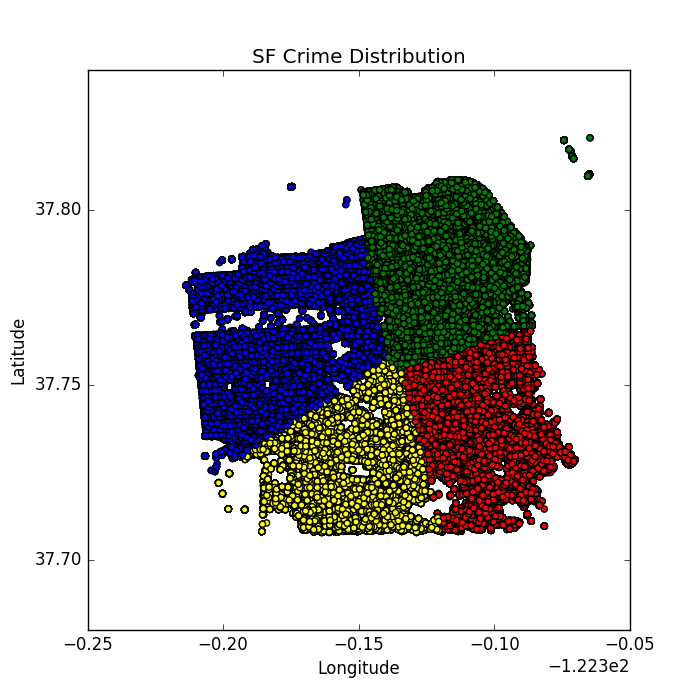

In [40]:
# plot 4 clusters
plt.figure(figsize=(7,7))
plt.title('SF Crime Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.scatter(pddf_pred.features[0], pddf_pred.features[1], s = 0.5, c=pddf_pred.prediction.values)

plt.scatter(x_c, y_c, c = c_p)
fig2 = plt.show()

display(fig2)